# Hypothesis Testing - Guided Practice

- ds-flex 
- xx/xx/xx

# Hypothesis Testing Steps

## STEP 1: State Your Hypothesis & Null Hypothesis 

- **Before selecting the correct hypothesis test, you must first officially state your null hypothesis ($H_0$) and alternative hypothesis ($H_A$ or $H_1$)**



- **Before stating your hypotheses, ask yourself:**
    1. What question am I attempting to answer?
    2. What metric/value am I measuring to answer this question?
    3. Do I expect the groups to be different in a specific way? (i.e. one group greater than the other).
        - Or do I just think they'll be different, but don't know how?


## STEP 2: Determine the correct test for the data/hypothesis

<!-- based on data type and # of samples/groups -->

#### Q1: What type of data am I measuring? Is it numeric or categorical?


#### Q2: How many groups/samples am I comparing?
- One group vs a known value?
- Two groups?
- More than two groups?


#### Using the answers to the above 2 questions: select the type of test from this table.

|*What type of comparison?* | Numeric Data | Categorical Data|
| --- | --- | --- |
|**1 Sample vs Known Quantity/Target**|1 Sample T-Test| Binomial Test|
|**2 Samples** | 2 Sample T-Test| Chi-Square|
|**More than 2**| ANOVA and/or Tukey | Chi Square|

## STEP 3: Perform the test

### Hypothesis Test Functions

`from scipy import stats`

| Hypothesis test| Function | 
 | --- | --- |
 | **1-sample t-test** |`stats.ttest_1samp()`|
 | **2-sample t-test** |`stats.ttest_ind()` | 
 | **One-Way ANOVA** | `stats.f_oneway()` | 
 | **Binomial test** |`stats.binom_test()` |
 | **Chi-Square test** | `stats.chi2_contingency()`|
 
 
- Set your $\alpha$ level (typically $\alpha$ =.05)
- **Perform the test to get your p-value and interpret it (next step).**

## STEP 4: Interpret the test result and perform any post-hoc test

#### Interpret your p-value compared to $\alpha$
- **If p > $\alpha$:**:
    - We fail to reject the null hypothesis.
        - The observed difference likely occurred due to random chance, not do to the effect we were analyzing.
        - We have essentially disproved our hypothesis.
    - The result is not significant.
    
    
- **If p is < $\alpha$:**
    - We reject the null hypothesis. 
        - The observed difference was most likely NOT due to random chance.
        - We have "supported" our hypothesis. (we NEVER "prove" our hypothesis)
    - The result is significant.

#### Next Steps 
- **If we did not have significant results:**
    - We are done! Write up the final answer. 
    
- **If we had significant results:**

    - If there are 2 groups:
        - Use a visualization to confirm which group had the larger/smaller value. (e.g. a barplot).
        - Calculate effect size (e.g. Cohen's $d$)
        - Write up the final answer.

    - If there are >2 groups:
        - Run a pairwise multiple-comparison test (e.g. Tukey's test) to determine which groups were different.
            - [Tukey pairwise comparison test](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html) (`statsmodels.stats.multicomp.pairwise_tukeyhsd`)


- Report statistical power (optional)

#### Post-Hoc Functions:

| Post-Hoc Tests/Calculatons|Function|
|--- | --- |
|**Tukey's Pairwise Comparisons** | `statsmodels.stats.multicomp.pairwise_tukeyhsd`|
|**Effect Size**| `Cohens_d`|
|**Statistical Power** | `statsmodels.stats.power`:<br>  `TTestIndPower` , `TTestPower`

# Activity: Hypothesis Testing with Insurance Data

## US Health Insurance Dataset

- https://www.kaggle.com/teertha/ushealthinsurancedataset

In [1]:
## import the standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## import hypothesis testing functions
%load_ext autoreload
%autoreload 2
import functions as fn

from scipy import stats


In [2]:
# Load in the insurance.csv in the data folder and display preview
df = pd.read_csv("data/insurance.csv")
display(df.head())
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
stats.binom_test

<function scipy.stats.morestats.binom_test(x, n=None, p=0.5, alternative='two-sided')>

## Questions to Answer

>- Q1. Do smokers have higher insurance charges than non-smokers?
>- Q2. Are women and men equally likely to be smokers?
>- Q3. Do different regions have different charges, on average?

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Q1: Do smokers have higher insurance charges than non-smokers?

#### Formally State the Hypothesis

- $H_1$ : Smokers have higher charges than non-smokers.

- $H_0$ : Smokers and non-smokers are charged the same. 

#### Determine the Correct Statistical Test 

- Q1: What type of data are we comparing?
    - A: Numeric (charges)
    
    
- Q2: How many samples/groups are being compared?
    - A: 2 smokers vs. non-smokers
    
    
- Therefore, the correct test to perform would be:
    - A: 2-sample T-Test

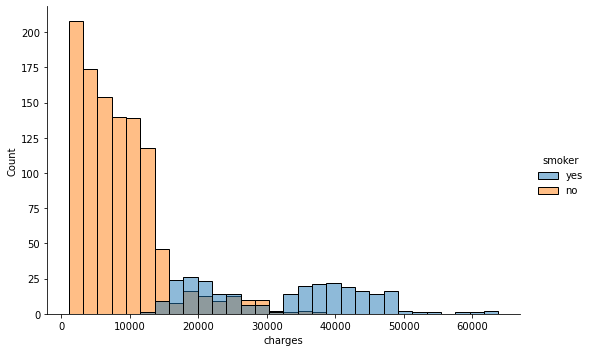

In [33]:
## let's visualize the distribution of charges for smokers and non-smokers
g = sns.displot(data=df,hue='smoker',x='charges',aspect=1.5)

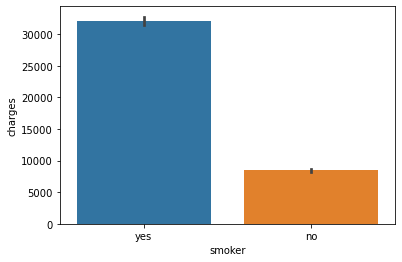

In [36]:
## let's visualize the average charges for smokers and non-smokers
sns.barplot(data=df,x='smoker',y='charges',ci=68);

In [6]:
## save all charges for smokers in a new smokers variable
smokers = df.loc[ df['smoker']=='yes','charges']
smokers

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [7]:
## now do the same for the non-smokers
nonsmokers = df.loc[ df['smoker']=='no','charges']
nonsmokers

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [8]:
## Run the correct hypothesis test from scipy
result = stats.ttest_ind(smokers,nonsmokers)
result

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [37]:
## interpret the p-value 
# is the result significant?
result.pvalue < .05

True

In [38]:
## calcualte the effect size using cohen's d
d = fn.Cohen_d(smokers,nonsmokers)
d

INTERPRETATION OF COHEN's D: 
    > Small effect = 0.2
    > Medium Effect = 0.5
    > Large Effect = 0.8
    


3.160132313169358

#### Conclusion/Interpretation

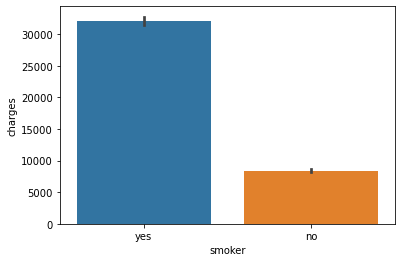

In [10]:
## Make a barplot of the average charges for smokers vs non-smokers
ax = sns.barplot(data=df,x='smoker',y='charges',ci=68)

>- Smokers have significantly higher insurance charges than non-smokers (p<.05), with a large effect size (Cohen's d=3.16). 

### Q2: Are women and men equally likely to be smokers?

#### Formally State the Hypothesis
- $H_1$ : Men are more likely to smoke than women. 

- $H_0$ : Men and women are equally likelt to be smokers.

#### Determine the Correct Statistical Test 

- Q1: What type of data are we comparing?
    - A:  Categorical
    
    
- Q2: How many samples/groups are being compared?
    - A:  2 samples
    
    
- Therefore, the correct test to perform would be:
    - A: Chi-Square Test

<AxesSubplot:xlabel='sex', ylabel='count'>

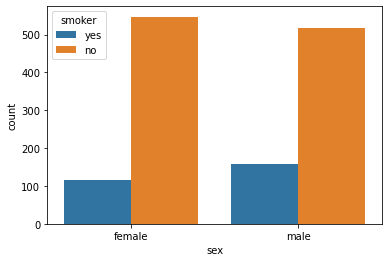

In [16]:
## Visualize the # of smokers by sex
sns.countplot(data=df,x='sex',hue='smoker')

In [12]:
## Get contingency table using pd.crosstab
observed = pd.crosstab(df['smoker'],df['sex'])
observed

sex,female,male
smoker,,
no,547,517
yes,115,159


In [43]:
## perform the correct test for the hypothesis
stat,p,dof, expected =stats.chi2_contingency(observed)
print(p)
expected

0.006548143503580696


array([[526.43348281, 537.56651719],
       [135.56651719, 138.43348281]])

In [42]:
## interpret the p-value 
# is the result significant?
p <.05

True

#### Conclusion/Interpretation

-  

### Q3: Do different regions have different insurance charges?

#### Formally State the Hypothesis
- $H_1$ :
- $H_0$ : 

#### Determine the Correct Statistical Test 

- Q1: What type of data are we comparing?
    - A: Numeric (charges)
    
    
- Q2: How many samples/groups are being compared?
    - A: >2 (4 regions)
    
    
- Therefore, the correct test to perform would be:
    - A: one-way ANOVA

In [44]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


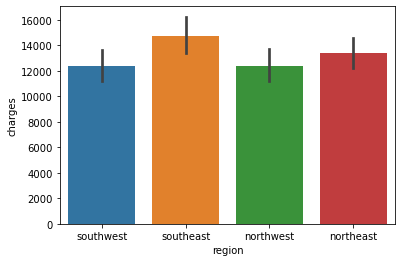

In [56]:
## visualize the regions vs charges
sns.barplot(data=df, x='region',y='charges');

In [20]:
## separate the data into groups
groups = {}

for region in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[ df['region']==region, 'charges']
    data.name = region
    
    # save into the dictionary
    groups[region] = data

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [48]:
# perform the correct hypothesis test
# method 1
result = stats.f_oneway(*groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [50]:
# perform the correct hypothesis test
# method 2
result = stats.f_oneway(groups['northeast'],
                       groups['northwest'],
                       groups['southeast'],
                        groups['southwest'])
result

F_onewayResult(statistic=2.9696266935891193, pvalue=0.0308933560705201)

In [51]:
## interpret the p-value 
# is the result significant?
result.pvalue < .05

True

#### Determine which pairs of groups were different

In [52]:
## save the charges column as values and the region as labels
values = df['charges']
labels = df['region']

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7002,-3428.9473,1451.329,False
northeast,southeast,1329.0269,0.4754,-1044.9543,3703.0081,False
northeast,southwest,-1059.4471,0.6584,-3499.5853,1380.691,False
northwest,southeast,2317.8361,0.0583,-54.212,4689.8842,False
northwest,southwest,-70.638,0.9,-2508.8955,2367.6195,False
southeast,southwest,-2388.4741,0.0477,-4760.5221,-16.426,True


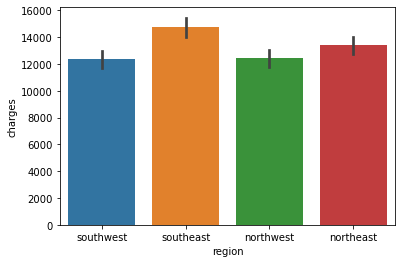

In [30]:
## Make a barplot using ci=68 (Standard Error of the Mean)
sns.barplot(data=df, x='region',y='charges',ci=68);

#### Conclusion/Interpretation

-  

## Your Turn! Think of a 4th Hypothesis to test.

- example: Is our sample's BMI representative of the the national average BMI? (See the pdf in the data folder for the stats)

### Formally State the Hypothesis
- $H_1$ :
- $H_0$ : 

### Determine the Correct Statistical Test 

- Q1: What type of data are we comparing?
    - A: |
    
    
- Q2: How many samples/groups are being compared?
    - A: 
    
    
- Therefore, the correct test to perform would be:
    - A:

# Conclusion/Recap

- 